# 1. Import Necessary Libraries

In [1]:
import numpy as np
import os
import pickle
from glob import glob
import torch
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
data_dir = "/Users/mohammadmohammadi/Documents/Research/EVBatteries"

## Checking around the structure of pickle files of each car

### In battery_dataset1

In [3]:

# Replace with your actual dataset path
data_path = data_dir+'/battery_dataset1/data'
data_pkl_files = glob(data_path+'/*.pkl')
print("Total pickle files in dataset 1 :"+str(len(data_pkl_files)))
dataset_path = data_pkl_files[0]
this_pkl_file = torch.load(dataset_path)

# Inspect the structure
print("Main structure of pickle file:")
print(type(this_pkl_file))

print("type and dimension of first element in tuple:")
print(type(this_pkl_file[0]))  
print(len(this_pkl_file[0]))  

print("type and dimension of 3 first elements of the first element in tuple:")
for i in range(len(this_pkl_file[0])):
    print(type(this_pkl_file[0][i]))
    print(len(this_pkl_file[0][i]))
    if i == 2:
        break

print("type and value of each members of first element of the first element in tuple:")
for i in range(len(this_pkl_file[0])):
    for j in this_pkl_file[0][i]:
        print(type(j))
        print(j)
    if i == 0:
        break

print("type and dimension of second element in tuple:")
print(type(this_pkl_file[1]))
print(len(this_pkl_file[1]))

print("keys of second element in tuple:")
print(this_pkl_file[1].keys())

print("values of second element in tuple:")
print(this_pkl_file[1])  


Total pickle files in dataset 1 :629121
Main structure of pickle file:
<class 'tuple'>
type and dimension of first element in tuple:
<class 'numpy.ndarray'>
128
type and dimension of 3 first elements of the first element in tuple:
<class 'numpy.ndarray'>
8
<class 'numpy.ndarray'>
8
<class 'numpy.ndarray'>
8
type and value of each members of first element of the first element in tuple:
<class 'numpy.float64'>
4.091666666666667
<class 'numpy.float64'>
-14.3
<class 'numpy.float64'>
88.16666666666667
<class 'numpy.float64'>
4.095333333333333
<class 'numpy.float64'>
4.0713333333333335
<class 'numpy.float64'>
14.0
<class 'numpy.float64'>
10.0
<class 'numpy.float64'>
0.0
type and dimension of second element in tuple:
<class 'collections.OrderedDict'>
5
keys of second element in tuple:
odict_keys(['label', 'car', 'charge_segment', 'mileage', 'capacity'])
values of second element in tuple:
OrderedDict([('label', '00'), ('car', 43), ('charge_segment', '365'), ('mileage', 153177.12960000001), ('c

/var/folders/w7/4dvwl9yj5zgch4zz70np_c1h0000gn/T/ipykernel_67772/1452401956.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  this_pkl_file = torch.load(dataset_path)


In [4]:
# Load the pickle file
example_data = this_pkl_file

# Check the structure
print(f"Data type: {type(example_data)}")  # Should be a tuple
print(f"Number of elements: {len(example_data)}")  # Should be 2

# Extract elements
time_series_data = example_data[0]  # First element (numpy.ndarray)
meta_data = example_data[1]         # Second element (OrderedDict)

# Inspect the contents
print("Time-series data shape:", time_series_data.shape)  # Should be (128, 8)
print("Metadata:", meta_data)

Data type: <class 'tuple'>
Number of elements: 2
Time-series data shape: (128, 8)
Metadata: OrderedDict([('label', '00'), ('car', 43), ('charge_segment', '365'), ('mileage', 153177.12960000001), ('capacity', np.float64(40.504931000000006))])


In [5]:
# Print metadata
for key, value in meta_data.items():
    print(f"{key}: {value}")


label: 00
car: 43
charge_segment: 365
mileage: 153177.12960000001
capacity: 40.504931000000006


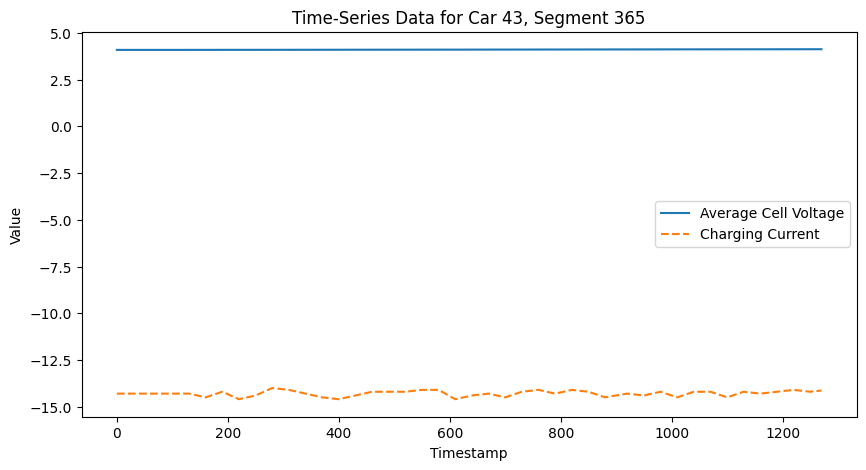

In [6]:
# Extract individual features (columns)
timestamps = time_series_data[:, 7]  # Assuming column 7 is 'timestamp'
voltages = time_series_data[:, 0]    # Assuming column 0 is 'average cell voltage'
currents = time_series_data[:, 1]    # Assuming column 1 is 'charging current'

# Plot the data
plt.figure(figsize=(10, 5))

# Voltage over time
plt.plot(timestamps, voltages, label='Average Cell Voltage')

# Current over time
plt.plot(timestamps, currents, label='Charging Current', linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title(f"Time-Series Data for Car {meta_data['car']}, Segment {meta_data['charge_segment']}")
plt.legend()
plt.show()


Dataset 1:
- Total pickle files: 629,121
- Each file contains:
  Tuple:
    - Element 0: <numpy.ndarray> (Time-series data)
      - Shape: (128, 8)  # 128 samples with 8 features each
      - Each sample (row):
        - Feature 1: <numpy.float64> (e.g., average cell voltage)
        - Feature 2: <numpy.float64> (e.g., charging current)
        - Feature 3: <numpy.float64> (e.g., max cell voltage)
        - Feature 4: <numpy.float64> (e.g., min cell voltage)
        - Feature 5: <numpy.float64> (e.g., max cell temperature)
        - Feature 6: <numpy.float64> (e.g., min cell temperature)
        - Feature 7: <numpy.float64> (e.g., SOC)
        - Feature 8: <numpy.float64> (e.g., timestamp)

    - Element 1: <collections.OrderedDict> (Metadata)
      - Keys:
        - 'label': <str> (e.g., '00' for normal, others for anomalies)
        - 'car': <int> (Car identifier)
        - 'charge_segment': <str> (Charge segment ID)
        - 'mileage': <float> (Car mileage)
        - 'capacity': <numpy.float64> (Battery capacity)


# 2. Load Dataset

This section groups .pkl files by car numbers and prepares the dataset for further processing.

In [ ]:
# Define the data directory
data_path = data_dir+'/battery_dataset1/data'

# Get all .pkl files
data_pkl_files = glob(data_path + '/*.pkl')

# Initialize storage
ind_pkl_files = []  # Paths for in-distribution files
ood_pkl_files = []  # Paths for out-of-distribution files
ind_car_num_list = set()  # Car numbers for IND
ood_car_num_list = set()  # Car numbers for OOD
all_car_dict = {}  # Dictionary to group files by car number

# Process each pickle file
for each_path in tqdm(data_pkl_files, desc="Processing dataset"):
    # Load the pickle file
    this_pkl_file = torch.load(each_path)
    
    # Extract metadata
    this_car_number = this_pkl_file[1]['car']  # Car identifier
    this_label = this_pkl_file[1]['label']     # Label ('00' for IND, others for OOD)
    
    # Categorize based on the label
    if this_label == '00':
        ind_pkl_files.append(each_path)
        ind_car_num_list.add(this_car_number)
    else:
        ood_pkl_files.append(each_path)
        ood_car_num_list.add(this_car_number)
    
    # Add the car number to the global car list
    if this_car_number not in all_car_dict:
        all_car_dict[this_car_number] = []
    all_car_dict[this_car_number].append(each_path)

# Output summary
print(f"Total files processed: {len(data_pkl_files)}")
print(f"In-distribution files: {len(ind_pkl_files)}")
print(f"Out-of-distribution files: {len(ood_pkl_files)}")
print(f"Unique cars in IND: {len(ind_car_num_list)}")
print(f"Unique cars in OOD: {len(ood_car_num_list)}")

Processing dataset:   0%|          | 0/629121 [00:00<?, ?it/s]/var/folders/w7/4dvwl9yj5zgch4zz70np_c1h0000gn/T/ipykernel_67772/4163420362.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# 3. Visualize a Car’s Data

Once we have the file paths grouped by car numbers, we can load and visualize the data for a specific car.
This section loads a specific car’s data and visualizes the time-series information for one of its charge segments.

In [ ]:

# Choose a car number
car_number = list(all_car_dict.keys())[0]  # Select the first car
car_files = all_car_dict[car_number]      # Get all files for this car

# Load a specific file (first charge segment for the chosen car)
example_path = car_files[0]
example_data = torch.load(example_path)

# Extract time-series data (first element in tuple) and metadata (second element)
time_series = example_data[0]  # numpy.ndarray, shape: (128, 8)
meta_data = example_data[1]    # OrderedDict

# Print metadata
print("Metadata for the selected file:")
for key, value in meta_data.items():
    print(f"  {key}: {value}")

# Extract features for visualization
timestamps = time_series[:, 7]  # Assuming column 7 is 'timestamp'
voltages = time_series[:, 0]    # Assuming column 0 is 'average cell voltage'
currents = time_series[:, 1]    # Assuming column 1 is 'charging current'

# Plot time-series data
plt.figure(figsize=(10, 5))

plt.plot(timestamps, voltages, label='Average Cell Voltage')
plt.plot(timestamps, currents, label='Charging Current', linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title(f"Time-Series Data for Car {car_number}, Segment {meta_data['charge_segment']}")
plt.legend()
plt.show()